In [1]:
import random as rnd
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
!pip install scikit-learn==1.1.2
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
my_dataset = datasets.make_classification(n_samples = 100, #Количество образцов.
                           n_features = 2, #Общее количество характеристик. 
                           n_informative = 2, #Количество информативных признаков. 
                           n_redundant = 0, #Количество избыточных функций. 
                           n_repeated = 0, #Количество повторяющихся признаков, выбранных случайным образом из информативных и избыточных признаков.
                           n_classes = 2, #Количество классов (или меток) задачи классификации.
                           n_clusters_per_class = 2, #Количество кластеров на класс.
                           weights = None, #Пропорции образцов отнесены к каждому классу. Если None, то классы сбалансированы.
                           flip_y = 0.01, #Доля выборок, класс которых назначается случайным образом.
                           class_sep = 1.0,#Коэффициент, умножающий размер гиперкуба. Большие значения распределяют кластеры/классы и упрощают задачу классификации.
                           hypercube = False, #Если True, кластеры помещаются в вершины гиперкуба.Если False, кластеры помещаются в вершины случайного многогранника.
                           shift = 0.0, #Сдвиг объектов на указанное значение. Если None, то объекты сдвигаются на случайное значение, нарисованное в [-class_sep, class_sep].
                           scale = 1.0, #Умножьте характеристики на указанное значение. 
                           shuffle = True, #Перемешайте образцы и функции.
                           random_state = None) #Определяет генерацию случайных чисел для создания набора данных. 

In [5]:
n = ['name1', 'name2'] # список имен 
names = []
for i in range(len(my_dataset[0])):
    names.append(n[i%len(n)])
alg_list = ["auto", "ball_tree", "kd_tree", "brute"]
alg = alg_list[0]
weights_list = ["uniform", "distance", "uniform", "distance", "distance"]
metric_list = ["minkowski", "euclidean"] # список метрик рассчета расстояния
metric = metric_list[0] # выбор метрики рассчета

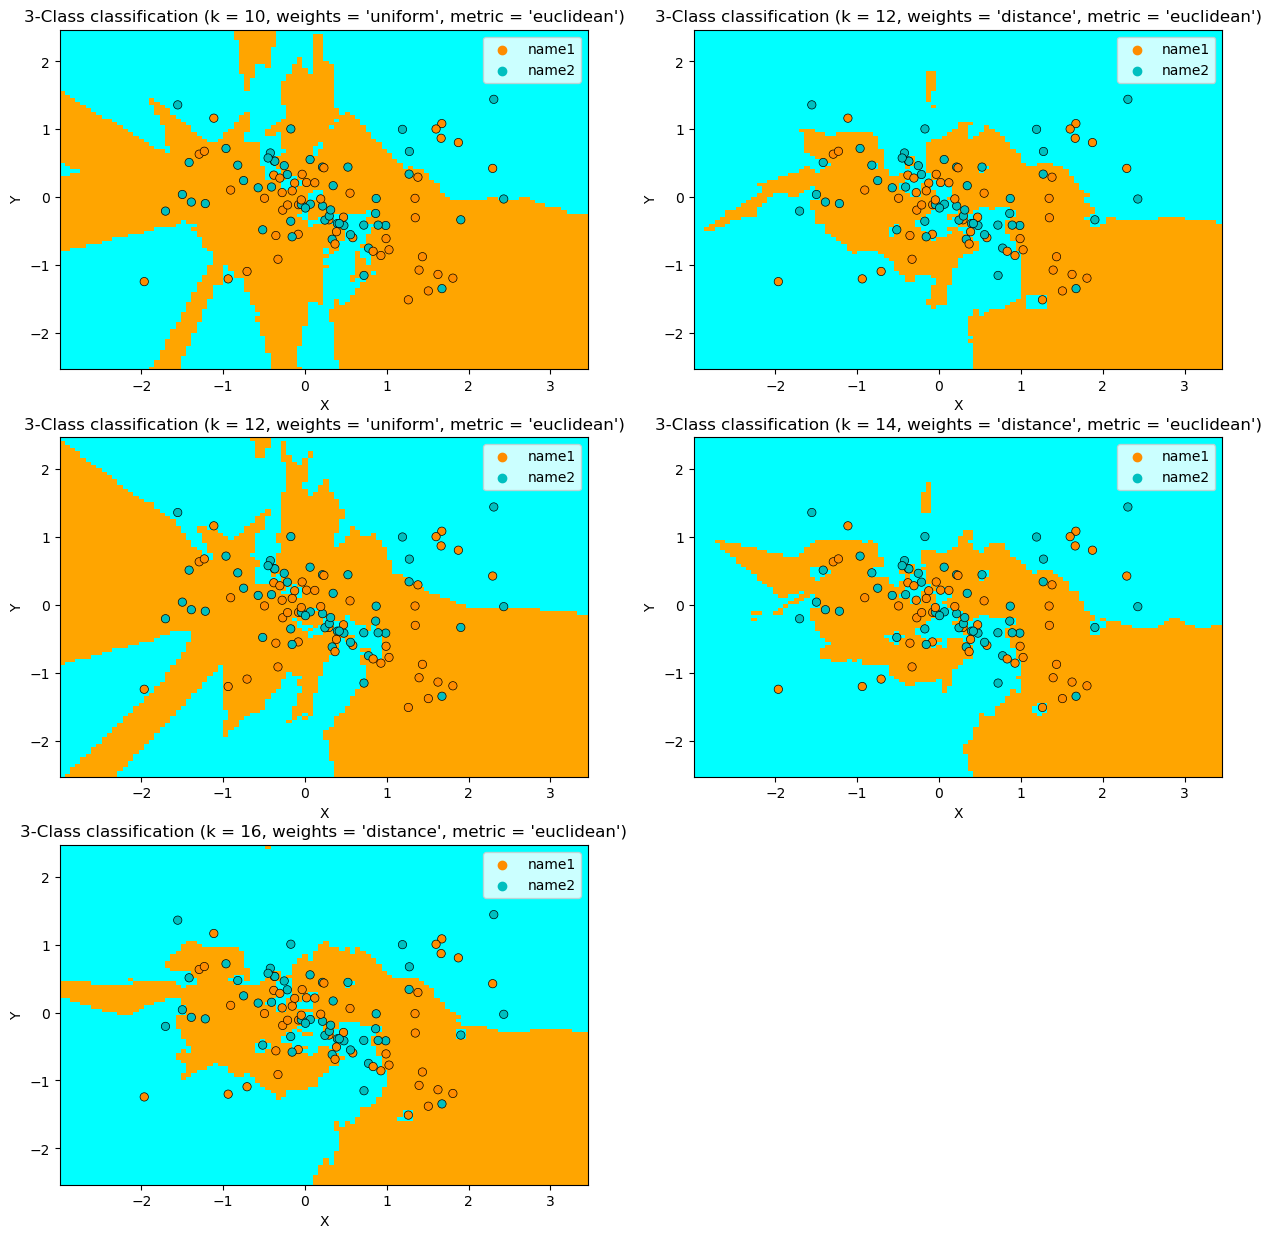

In [6]:
n_neighbors = 10
row = 0 # строка
col = 0 # столбец 

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = my_dataset[0][:, :2]
y = my_dataset[1]

# Create color maps
cmap_light = ListedColormap(["orange", "cyan"])
cmap_bold = ["darkorange", "c"]

_, ax = plt.subplots(3, 2, figsize=(15,15)) # создание массива для заполнения его графиками

for weights in weights_list:
    if weights == "distance":
        n_neighbors += 2
    if n_neighbors >= 9:
        metric = metric_list[1]
        
    # we create an instance of Neighbours Classifier and fit the data.    
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights, metric=metric)
    clf.fit(X, y)


    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax[row, col],
        response_method="predict",
        plot_method="pcolormesh",
        xlabel='X',
        ylabel='Y',
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=names,
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
        ax = ax[row, col]
    )
     # именование каждого графика
    ax[row,col].set_title("3-Class classification (k = %i, weights = '%s', metric = '%s')" % (n_neighbors, weights, metric))
    
    # алгоритм для заполнения массива
    col += 1
    if col == 2:
        col = 0
        row += 1
        
# удаление неиспользуемого графика
ax[2,1].set(frame_on=False)
ax[2,1].set_xticklabels([])
ax[2,1].set_yticklabels([])
ax[2,1].axes.set_visible(False)

plt.show()